# Report Plots

In [7]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
import visualkeras

import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import ImageFont
from collections import defaultdict

### Dataset Example Images

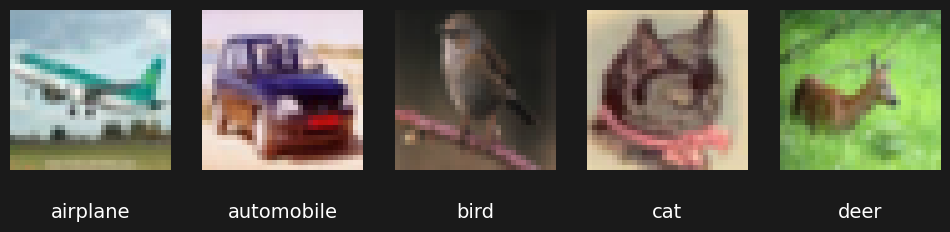

In [8]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig, axes = plt.subplots(1, 5, figsize = (12, 3), facecolor = '#1a1a1a')
fig.patch.set_facecolor('#1a1a1a')

for i, ax in enumerate(axes):
    indices = np.where(y_train == i)[0]
    random_index = np.random.choice(indices)
    ax.imshow(x_train[random_index])
    ax.set_axis_off()
    ax.text(0.5, -0.3, class_names[i], fontsize = 14, ha = 'center', color = 'white', transform = ax.transAxes)

plt.show()

### Dataset Class Distribution

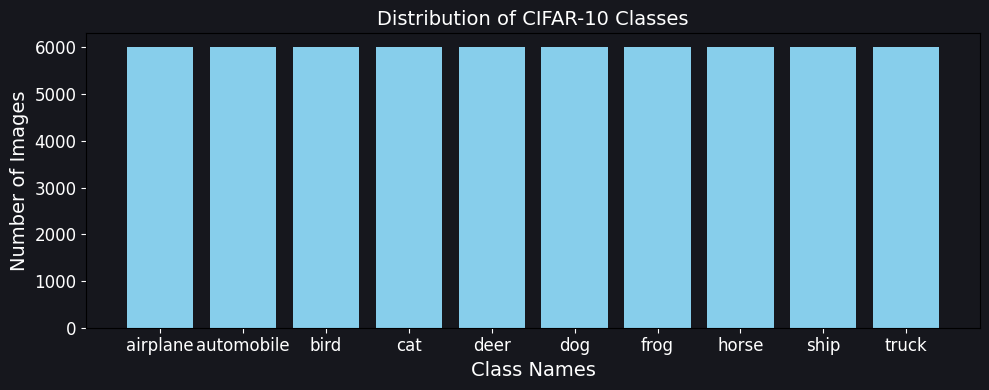

In [9]:
y_total = np.concatenate([y_train, y_test])

class_counts = np.bincount(y_total.flatten())

fig, ax = plt.subplots(figsize = (10, 4), facecolor = '#16171d')

ax.bar(class_names, class_counts, color = 'skyblue')
ax.set_xlabel('Class Names', fontsize = 14, color = 'white')
ax.set_ylabel('Number of Images', fontsize = 14, color = 'white')
ax.set_title('Distribution of CIFAR-10 Classes', fontsize = 14, color = 'white')
ax.set_facecolor('#16171d')
ax.tick_params(colors = 'white', labelsize = 12)

plt.tight_layout()
plt.show()

### Custom CNN Model Architecture

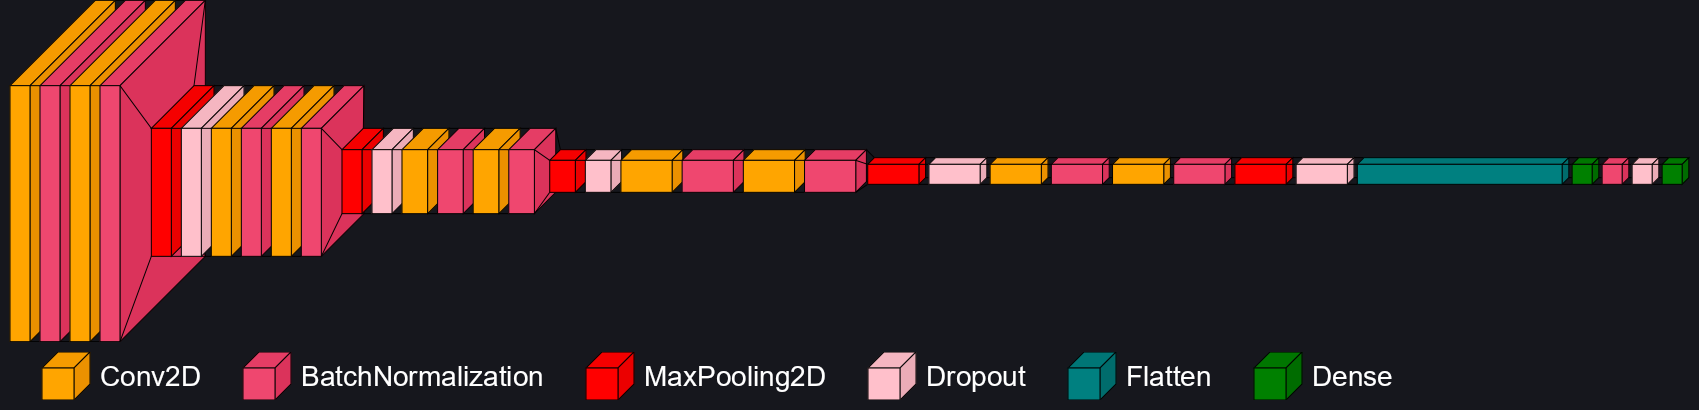

In [10]:
# Model architecture

model = Sequential([

Conv2D(128, (3, 3), activation = 'relu', padding = 'same', input_shape = (64, 64, 3)),
BatchNormalization(),
Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
BatchNormalization(),
MaxPooling2D((2, 2)),
Dropout(0.2),

Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
BatchNormalization(),
Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
BatchNormalization(),
MaxPooling2D((2, 2)),
Dropout(0.3),

Conv2D(256, (3, 3), activation = 'relu', padding = 'same'),
BatchNormalization(),
Conv2D(256, (3, 3), activation = 'relu', padding = 'same'),
BatchNormalization(),
MaxPooling2D((2, 2)),
Dropout(0.4),

Conv2D(512, (3, 3), activation = 'relu', padding = 'same'),
BatchNormalization(),
Conv2D(512, (3, 3), activation = 'relu', padding = 'same'),
BatchNormalization(),
MaxPooling2D((2, 2)),
Dropout(0.5),

Conv2D(512, (3, 3), activation = 'relu', padding = 'same'),
BatchNormalization(),
Conv2D(512, (3, 3), activation = 'relu', padding = 'same'),
BatchNormalization(),
MaxPooling2D((2, 2)),
Dropout(0.5),

(Flatten()),

Dense(128, activation = 'relu',kernel_regularizer = l2(0.01)),
BatchNormalization(),
Dropout(0.5),
Dense(10, activation = 'softmax',kernel_regularizer = l2(0.01))
])


# Model architecture plot

visualkeras.layered_view(model)

font_path = "./arial.ttf"
font = ImageFont.truetype(font_path, 28)  
font_color = (255, 255, 255)

background_color = (22, 23, 29)

color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'orange'
color_map[Dropout]['fill'] = 'pink'
color_map[MaxPooling2D]['fill'] = 'red'
color_map[Dense]['fill'] = 'green'
color_map[Flatten]['fill'] = 'teal'

visualkeras.layered_view(model, legend = True, color_map = color_map, font = font,
                         font_color = font_color, background_fill = background_color)

### ResNet50 Model Architecture

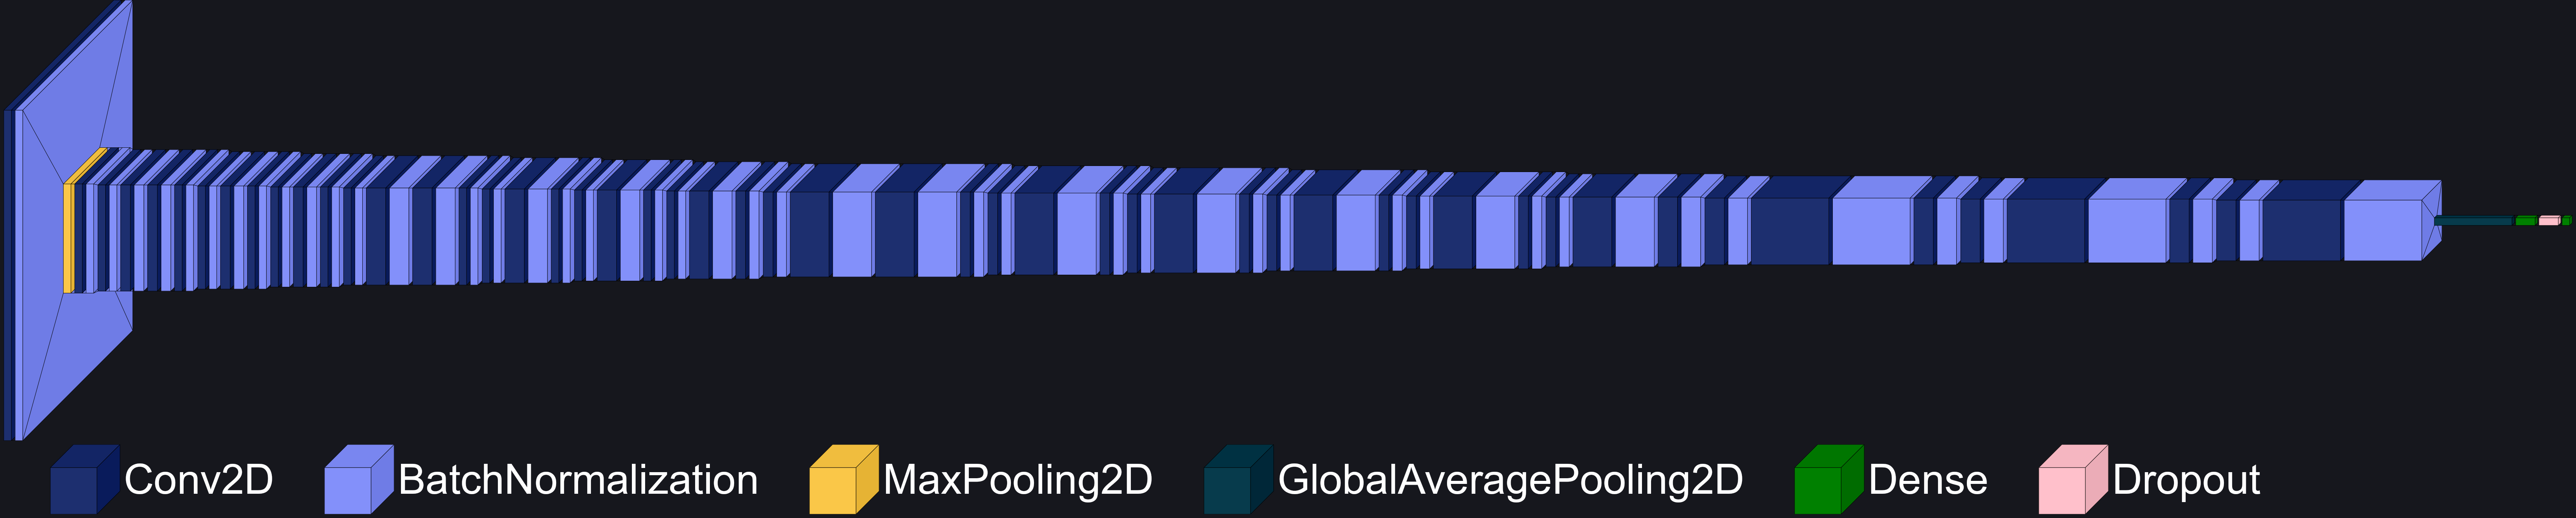

In [11]:
# Model architecture

model = Sequential()

# ResNet50 base

# We used 224x224 as input dimensions for the model plot due to spatial requirements,
# but the model was trained on 96x96.
model.add(InputLayer(shape = (224, 224, 3)))

# Stage 1

model.add(Conv2D(64, (7, 7), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((3, 3)))

# Stage 2

model.add(Conv2D(64, (1, 1), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (1, 1), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (1, 1), activation = 'relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (1, 1), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (1, 1), activation = 'relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (1, 1), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (1, 1), activation = 'relu'))
model.add(BatchNormalization())

# Stage 3

model.add(Conv2D(128, (1, 1), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (1, 1), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (1, 1), activation = 'relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (1, 1), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (1, 1), activation = 'relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (1, 1), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (1, 1), activation = 'relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (1, 1), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (1, 1), activation = 'relu'))
model.add(BatchNormalization())

# Stage 4

model.add(Conv2D(256, (1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(1024, (1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(1024, (1, 1), activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(256, (1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(1024, (1, 1), activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(256, (1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(1024, (1, 1), activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(256, (1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(1024, (1, 1), activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(256, (1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(1024, (1, 1), activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(256, (1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(1024, (1, 1), activation='relu'))
model.add(BatchNormalization())

# Stage 5

model.add(Conv2D(512, (1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(2048, (1, 1), activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(512, (1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(2048, (1, 1), activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(512, (1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(2048, (1, 1), activation='relu'))
model.add(BatchNormalization())

model.add(GlobalAveragePooling2D())

# Custom dense layers

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(10, activation = 'softmax'))


# Model architecture plot

visualkeras.layered_view(model)

font_path = "./arial.ttf"
font = ImageFont.truetype(font_path, 110)  
font_color = (255, 255, 255)

background_color = (22, 23, 29)

color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = '#1d2f6f'
color_map[Dropout]['fill'] = 'pink'
color_map[BatchNormalization]['fill'] = '#8390fa'
color_map[MaxPooling2D]['fill'] = '#fac748'
color_map[Dense]['fill'] = 'green'

visualkeras.layered_view(model, legend = True, color_map = color_map, font = font, font_color = font_color, background_fill = background_color)

### Data Augmentation Plot

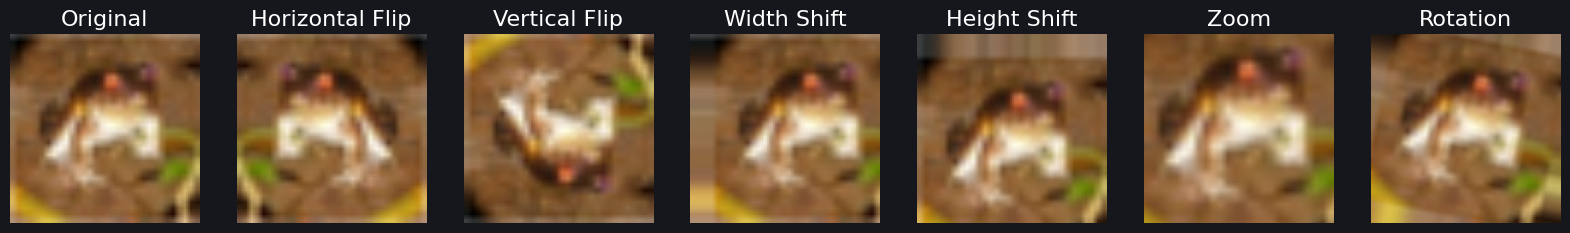

In [12]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = tf.image.resize(x_train, (96, 96)).numpy() / 255.0
x_test = tf.image.resize(x_test, (96, 96)).numpy() / 255.0

selected_image = x_train[0]

# Expand dimensions to create a batch
selected_image = np.expand_dims(selected_image, axis=0)

augmentations = [
    ImageDataGenerator(),
    lambda img: tf.image.flip_left_right(img[0]).numpy(),
    lambda img: tf.image.flip_up_down(img[0]).numpy(),
    ImageDataGenerator(height_shift_range=0.4),
    ImageDataGenerator(width_shift_range=0.4),
    lambda img: tf.image.resize(tf.image.central_crop(img[0], central_fraction=0.8), (96, 96)).numpy(),
    ImageDataGenerator(rotation_range=45),
]

titles = ['Original', 'Horizontal Flip', 'Vertical Flip', 'Width Shift', 'Height Shift', 'Zoom', 'Rotation']


# Augmentation plot

fig, axes = plt.subplots(1, 7, figsize=(20, 5))
fig.patch.set_facecolor('#16171d')


for i in range(7):
    if isinstance(augmentations[i], ImageDataGenerator):
        augmented_images_iter = augmentations[i].flow(selected_image, batch_size=1, shuffle=False, seed=42)
        # Get the augmented image from the generator
        augmented_image = next(augmented_images_iter)[0]
    else:
        # Apply the augmentation directly
        augmented_image = augmentations[i](selected_image)
    axes[i].set_title(titles[i], color = 'white')
    axes[i].imshow(augmented_image)
    axes[i].set_title(titles[i], fontsize = 16)
    axes[i].axis('off')

plt.show()